In [1]:
import matplotlib.pyplot as plt
import numpy as np
import keras
import os
from tensorflow.keras import layers, models
import cv2
import mediapipe as mp
from tkinter import*
from PIL import Image, ImageTk

In [ ]:
# import random
# import shutil

# # Define paths
# train_dir = "asl_alphabet_train/asl_alphabet_train"
# test_dir = "asl_alphabet_test/asl_alphabet_test"

# # Create asl_test directory if it doesn't exist
# if not os.path.exists(test_dir):
#     os.makedirs(test_dir)

# # Loop through each item in asl_train directory
# for item in os.listdir(train_dir):
#     item_path = os.path.join(train_dir, item)
    
#     # Check if item is a directory
#     if os.path.isdir(item_path):
#         # Create corresponding directory in asl_test directory
#         test_item_path = os.path.join(test_dir, item)
#         if not os.path.exists(test_item_path):
#             os.makedirs(test_item_path)
        
#         # Get list of all images in the item directory
#         images = os.listdir(item_path)
        
#         # Randomly select 100 images for testing
#         test_images = random.sample(images, 600)
        
#         # Move selected images to asl_test/item_folder
#         for image in test_images:
#             src = os.path.join(item_path, image)
#             dst = os.path.join(test_item_path, image)
#             shutil.move(src, dst)
        
#         # Move remaining images to asl_train/item_folder
#         for image in images:
#             if image not in test_images:
#                 src = os.path.join(item_path, image)
#                 dst = os.path.join(item_path, image)
#                 shutil.move(src, dst)


In [2]:
import os
import cv2
import numpy as np
import pickle

# Initialize MediaPipe Hands
mp_hands = mp.solutions.hands
hands = mp_hands.Hands(static_image_mode=False, max_num_hands=1, min_detection_confidence=0.5)

# Function to extract hand landmark coordinates from RGB images
def extract_landmarks(image):
    # Convert image to RGB
    rgb_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
    # Process image to detect hand landmarks
    results = hands.process(rgb_image)
    
    # If hand landmarks are detected
    if results.multi_hand_landmarks:
        hand_landmarks = results.multi_hand_landmarks[0]  # Assuming only one hand is detected
        landmark_coords = []
        for landmark in hand_landmarks.landmark:
            # Extract X and Y coordinates of each landmark
            landmark_coords.append((landmark.x, landmark.y))
        return np.array(landmark_coords)
    else:
        return None

# Function to load images and extract landmarks and labels
def load_data(dataset_dir, save_file="test_data.pkl"):
    data = []
    labels = []
    
    # Mapping from uppercase letters to numbers
    letter_to_number = {'A': 0, 'B': 1, 'C': 2, 'D': 3, 'E': 4, 'F': 5, 'G': 6, 'H': 7, 'I': 8, 'J': 9,
                        'K': 10, 'L': 11, 'M': 12, 'N': 13, 'O': 14, 'P': 15, 'Q': 16, 'R': 17, 'S': 18,
                        'T': 19, 'U': 20, 'V': 21, 'W': 22, 'X': 23, 'Y': 24, 'Z': 25, 'space': 26}
    
    # Check if the data has been saved before
    if os.path.exists(save_file):
        with open(save_file, 'rb') as f:
            saved_data = pickle.load(f)
            return saved_data
    
    for letter_folder in os.listdir(dataset_dir):
        letter_path = os.path.join(dataset_dir, letter_folder)
        # Skip non-directory files, such as .DS_Store
        if not os.path.isdir(letter_path):
            continue
        for filename in os.listdir(letter_path):
            if filename.endswith(".jpg") or filename.endswith(".png"):
                # Read the image
                image_path = os.path.join(letter_path, filename)
                image = cv2.imread(image_path)
                
                # Extract hand landmarks
                landmarks = extract_landmarks(image)
                
                if landmarks is not None:
                    # Map letter to number
                    label_number = letter_to_number[letter_folder]
                    data.append(landmarks)
                    labels.append(label_number)
    
    # Save the extracted data
    with open(save_file, 'wb') as f:
        pickle.dump((np.array(data), np.array(labels)), f)
    
    return np.array(data), np.array(labels)

# # Load the data
# data, labels = load_data("asl_alphabet_train")


I0000 00:00:1714406526.247551 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


INFO: Created TensorFlow Lite XNNPACK delegate for CPU.


In [12]:
import pickle

# Load the saved data from the pickle file
with open("train_data.pkl", 'rb') as f:
    saved_data = pickle.load(f)

# Extract the data and labels from the loaded data
train_data, train_labels = saved_data


In [ ]:
# # Initialize MediaPipe Hands
# mp_hands = mp.solutions.hands
# hands = mp_hands.Hands(static_image_mode=False, max_num_hands=1, min_detection_confidence=0.5)

# # Function to extract hand landmark coordinates from RGB images
# def extract_landmarks(image):
#     # Convert image to RGB
#     rgb_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
#     # Process image to detect hand landmarks
#     results = hands.process(rgb_image)
    
#     # If hand landmarks are detected
#     if results.multi_hand_landmarks:
#         hand_landmarks = results.multi_hand_landmarks[0]  # Assuming only one hand is detected
#         landmark_coords = []
#         for landmark in hand_landmarks.landmark:
#             # Extract X and Y coordinates of each landmark
#             landmark_coords.append((landmark.x, landmark.y))
#         return np.array(landmark_coords)
#     else:
#         return None

# # Function to load images and extract landmarks and labels
# def load_data(dataset_dir):
#     data = []
#     labels = []
    
#     # Mapping from uppercase letters to numbers
#     letter_to_number = {'A': 0, 'B': 1, 'C': 2, 'D': 3, 'E': 4, 'F': 5, 'G': 6, 'H': 7, 'I': 8, 'J': 9,
#                         'K': 10, 'L': 11, 'M': 12, 'N': 13, 'O': 14, 'P': 15, 'Q': 16, 'R': 17, 'S': 18,
#                         'T': 19, 'U': 20, 'V': 21, 'W': 22, 'X': 23, 'Y': 24, 'Z': 25, 'space': 26}
    
#     for letter_folder in os.listdir(dataset_dir):
#         letter_path = os.path.join(dataset_dir, letter_folder)
#         # Skip non-directory files, such as .DS_Store
#         if not os.path.isdir(letter_path):
#             continue
#         for filename in os.listdir(letter_path):
#             if filename.endswith(".jpg") or filename.endswith(".png"):
#                 # Read the image
#                 image_path = os.path.join(letter_path, filename)
#                 image = cv2.imread(image_path)
                
#                 # Extract hand landmarks
#                 landmarks = extract_landmarks(image)
                
#                 if landmarks is not None:
#                     # Map letter to number
#                     label_number = letter_to_number[letter_folder]
#                     data.append(landmarks)
#                     labels.append(label_number)
    
#     return np.array(data), np.array(labels)

In [ ]:
# train_data, train_labels = load_data("asl_alphabet_train/asl_alphabet_train")

In [13]:
# Define the CNN-MediaPipe architecture
def create_cnn_mediapipe_model(input_shape):
    model = models.Sequential()

    # Convolutional layers
    model.add(layers.Conv1D(32, kernel_size=3, activation='relu', input_shape=input_shape))
    model.add(layers.MaxPooling1D(pool_size=2))
    model.add(layers.Conv1D(64, kernel_size=3, activation='relu'))
    model.add(layers.MaxPooling1D(pool_size=2))

    # Flatten layer
    model.add(layers.Flatten())

    # Fully connected layers
    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(27, activation='softmax'))

    return model

# Determine input shape based on the shape of the extracted landmarks
input_shape = train_data.shape[1:]  # Shape excluding the batch size dimension
cnn_mediapipe_model = create_cnn_mediapipe_model(input_shape)

# Create the model with the provided input shape
cnn_mediapipe_model = create_cnn_mediapipe_model(input_shape)

# Compile the model
cnn_mediapipe_model.compile(optimizer='adam',
                             loss='sparse_categorical_crossentropy',
                             metrics=['accuracy'])

In [15]:
# Train the model
cnn_mediapipe_model.fit(train_data, train_labels, epochs=15, batch_size=32)

Epoch 1/15
1333/1333 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9192 - loss: 0.2767
Epoch 2/15
1333/1333 ━━━━━━━━━━━━━━━━━━━━ 1s 973us/step - accuracy: 0.9223 - loss: 0.2676
Epoch 3/15
1333/1333 ━━━━━━━━━━━━━━━━━━━━ 1s 988us/step - accuracy: 0.9213 - loss: 0.2727
Epoch 4/15
1333/1333 ━━━━━━━━━━━━━━━━━━━━ 1s 989us/step - accuracy: 0.9249 - loss: 0.2520
Epoch 5/15
1333/1333 ━━━━━━━━━━━━━━━━━━━━ 1s 985us/step - accuracy: 0.9241 - loss: 0.2552
Epoch 6/15
1333/1333 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9270 - loss: 0.2519
Epoch 7/15
1333/1333 ━━━━━━━━━━━━━━━━━━━━ 1s 993us/step - accuracy: 0.9279 - loss: 0.2449
Epoch 8/15
1333/1333 ━━━━━━━━━━━━━━━━━━━━ 1s 993us/step - accuracy: 0.9295 - loss: 0.2371
Epoch 9/15
1333/1333 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9346 - loss: 0.2233
Epoch 10/15
1333/1333 ━━━━━━━━━━━━━━━━━━━━ 1s 999us/step - accuracy: 0.9339 - loss: 0.2241
Epoch 11/15
1333/1333 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9346 - loss: 0.2168
Epoch 12/15
1333

In [5]:
# test_data, test_labels = load_data("asl_alphabet_test/asl_alphabet_test")

In [6]:
import pickle

# Load the saved data from the pickle file
with open("test_data.pkl", 'rb') as f:
    saved_data = pickle.load(f)

# Extract the data and labels from the loaded data
test_data, test_labels = saved_data

In [8]:
# Evaluate the model on the test dataset
test_loss, test_accuracy = cnn_mediapipe_model.evaluate(test_data, test_labels)

print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

330/330 ━━━━━━━━━━━━━━━━━━━━ 0s 425us/step - accuracy: 0.9376 - loss: 0.1981
Test Loss: 0.17168422043323517
Test Accuracy: 0.9478376507759094


In [ ]:
# # Initialize MediaPipe Hands
# mp_hands = mp.solutions.hands
# hands = mp_hands.Hands(static_image_mode=False, max_num_hands=1)

# # Initialize OpenCV video capture
# cap = cv2.VideoCapture(0)

# while cap.isOpened():
#     # Read a frame from the camera
#     ret, frame = cap.read()
#     if not ret:
#         print("Failed to capture frame.")
#         break

#     # Mirror the frame horizontally
#     frame = cv2.flip(frame, 1)

#     # Convert the frame to RGB
#     rgb_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

#     # Process the frame with MediaPipe Hands
#     results = hands.process(rgb_frame)

#     if results.multi_hand_landmarks:
#         for hand_landmarks in results.multi_hand_landmarks:
#             # Accessing hand landmarks
#             landmarks = extract_landmarks(frame)
            
#             # Check if landmarks is not None
#             if landmarks is not None:
#                 landmarks = landmarks.reshape((1, 21, 2))

#                 # Make predictions
#                 predictions = cnn_mediapipe_model.predict(landmarks)

#                 # Get the index of the class with the highest probability
#                 predicted_class = np.argmax(predictions)
                
#                 class_to_letter = {0: 'A', 1: 'B', 2: 'C', 3: 'D', 4: 'E', 5: 'F', 6: 'G', 7: 'H', 8: 'I', 9: 'J',
#                                 10: 'K', 11: 'L', 12: 'M', 13: 'N', 14: 'O', 15: 'P', 16: 'Q', 17: 'R', 18: 'S',
#                                 19: 'T', 20: 'U', 21: 'V', 22: 'W', 23: 'X', 24: 'Y', 25: 'Z', 26: 'space'}

                
#                 # Map the predicted class to the corresponding letter
#                 predicted_letter = class_to_letter[predicted_class]

#                 # Print the predicted letter
#                 print('Predicted letter:', predicted_letter)

#     # Display the frame
#     cv2.imshow('Hand Landmarks', frame)

#     # Check for 'q' key to quit
#     if cv2.waitKey(1) & 0xFF == ord('q'):
#         break

# # Release the VideoCapture object and close OpenCV windows
# cap.release()
# cv2.destroyAllWindows()



330/330 ━━━━━━━━━━━━━━━━━━━━ 0s 482us/step


/var/folders/3k/xw6qw15s5zb611bx7g_40kj80000gn/T/ipykernel_20880/1217091827.py:31: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('viridis')


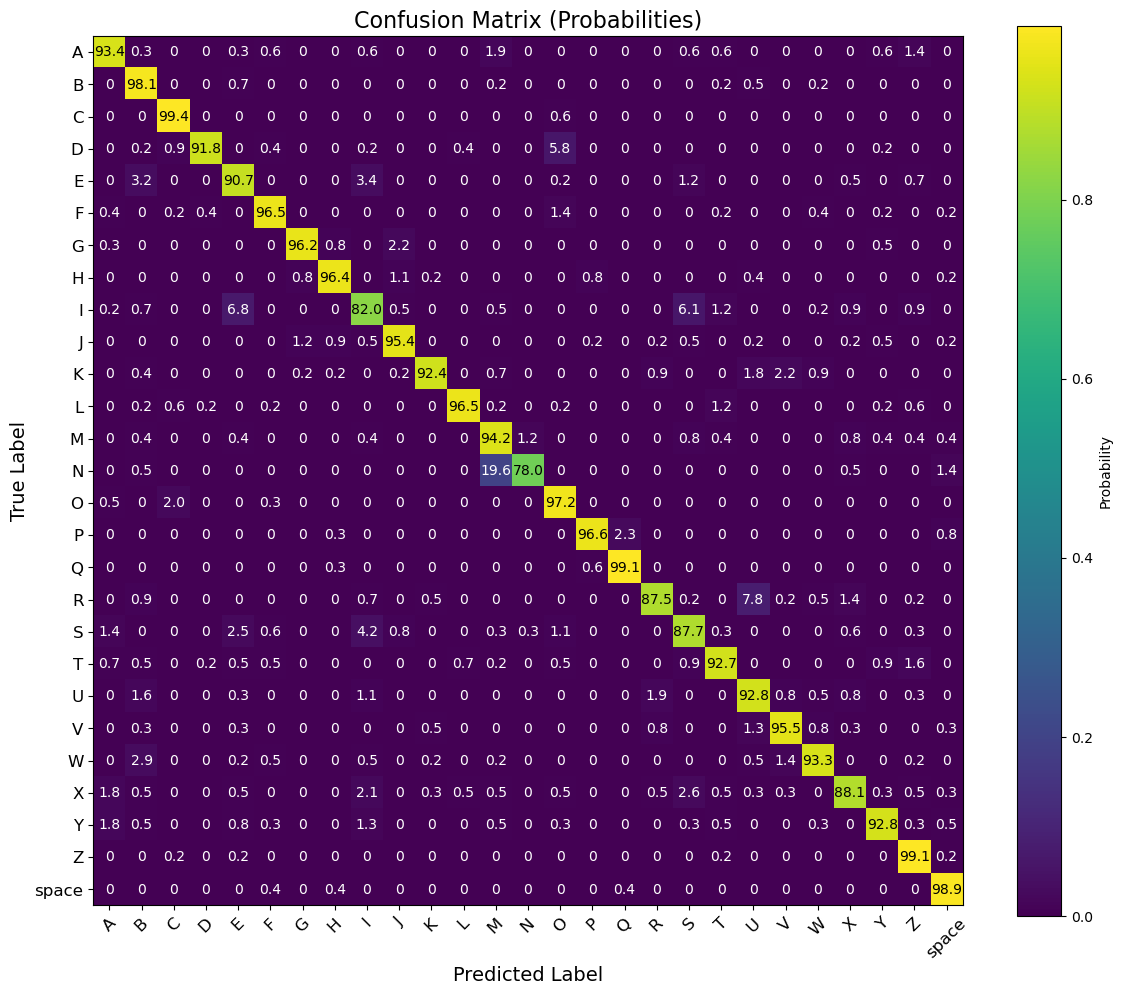

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from keras.utils import to_categorical

# Define letter labels and space for index 26
letter_labels = [chr(ord('A') + i) for i in range(26)]
letter_labels.append('space')

# Make predictions using the model
y_pred_prob = cnn_mediapipe_model.predict(test_data)

# Generate the confusion matrix
conf_matrix = confusion_matrix(test_labels, np.argmax(y_pred_prob, axis=1), normalize='true')

# Plot the confusion matrix with probabilities as text
plt.figure(figsize=(12, 10))
plt.title('Confusion Matrix (Probabilities)', fontsize=16)
plt.xlabel('Predicted Label', fontsize=14)
plt.ylabel('True Label', fontsize=14)
plt.xticks(np.arange(27), letter_labels, fontsize=12, rotation=45)
plt.yticks(np.arange(27), letter_labels, fontsize=12)

# Add a color gradient based on probabilities
cmap = plt.cm.get_cmap('viridis')
plt.imshow(conf_matrix, cmap=cmap)

# Add text with probabilities
for i in range(27):
    for j in range(27):
        text_color = 'white' if conf_matrix[i, j] < 0.5 else 'black'  # Choose text color based on contrast
        prob_text = f'{conf_matrix[i, j]*100:.1f}' if conf_matrix[i, j] > 0 else '0'
        plt.text(j, i, prob_text, ha='center', va='center', color=text_color, fontsize=10)

plt.colorbar(label='Probability')  # Add colorbar
plt.tight_layout()
plt.show()


In [16]:
def get_predicted_letter(frame):  
    # Convert the frame to RGB
    rgb_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

    # # Process the frame with MediaPipe Hands
    # results = mp_hands.process(rgb_frame)

    # Accessing hand landmarks
    landmarks = extract_landmarks(frame)
    
    # Check if landmarks is not None
    if landmarks is not None:
        landmarks = landmarks.reshape((1, 21, 2))

        # Make predictions
        predictions = cnn_mediapipe_model.predict(landmarks)

        max_probability = np.max(predictions)

        # Get the index of the class with the highest probability
        predicted_class = np.argmax(predictions)
        
        class_to_letter = {0: 'A', 1: 'B', 2: 'C', 3: 'D', 4: 'E', 5: 'F', 6: 'G', 7: 'H', 8: 'I', 9: 'J',
                        10: 'K', 11: 'L', 12: 'M', 13: 'N', 14: 'O', 15: 'P', 16: 'Q', 17: 'R', 18: 'S',
                        19: 'T', 20: 'U', 21: 'V', 22: 'W', 23: 'X', 24: 'Y', 25: 'Z', 26: 'space'}

        
        # Map the predicted class to the corresponding letter
        predicted_letter = class_to_letter[predicted_class]

        # Print the predicted letter
        print('Predicted letter:', predicted_letter)

        return predicted_letter, max_probability
    return None, None

In [18]:
import cv2
from tkinter import *
from PIL import Image, ImageTk
import mediapipe as mp

mp_hands = mp.solutions.hands
mp_drawing = mp.solutions.drawing_utils

class WebcamApp:
    def __init__(self, window) -> None:
        self.window = window
        self.window.title("ASL Translator")

        self.video_capture = cv2.VideoCapture(0)
        self.current_image = None

        self.canvas = Canvas(window, width=640, height=480)
        self.canvas.pack()

        self.letter_label = Label(window, text="Current Letter", font=("Arial", 18))
        self.letter_label.pack()

        self.probability_label = Label(window, text="Probability", font=("Arial", 18))
        self.probability_label.pack()

        # Add quit button
        self.quit_button = Button(window, text="Quit", command=self.quit)
        self.quit_button.pack()

        self.update_webcam()

    def update_webcam(self):
        ret, frame = self.video_capture.read()
        frame = cv2.flip(frame, 1)

        if ret:
            # Process the frame with MediaPipe Hands
            with mp_hands.Hands(static_image_mode=False, max_num_hands=1, min_detection_confidence=0.5, min_tracking_confidence=0.5) as hands:
                results = hands.process(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
                if results.multi_hand_landmarks:
                    for hand_landmarks in results.multi_hand_landmarks:
                        # Draw landmarks on the frame
                        mp_drawing.draw_landmarks(frame, hand_landmarks, mp_hands.HAND_CONNECTIONS)
            
            # Convert the frame to ImageTk format
            self.current_image = Image.fromarray(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
            self.photo = ImageTk.PhotoImage(self.current_image)
            
            # Update the canvas with the new image
            self.canvas.create_image(0, 0, image=self.photo, anchor=NW)

            # Get the predicted letter
            predicted_letter, probability = get_predicted_letter(frame)
            # Update the label text with the random letter
            self.letter_label.config(text=f"Current Letter: {predicted_letter}")
            self.probability_label.config(text=f"Probability: {probability}")

        # Call update_idletasks to refresh the Tkinter window
        self.window.update_idletasks()
        
        # Schedule the next update after 15 milliseconds
        self.window.after(15, self.update_webcam)
    
    # Quit function
    def quit(self):
        self.window.destroy()

root = Tk()
app = WebcamApp(root)
root.mainloop()


[ WARN:0@806.005] global /private/var/folders/k1/30mswbxs7r1g6zwn8y4fyt500000gp/T/abs_11nitadzeg/croot/opencv-suite_1691620374638/work/modules/videoio/src/cap_gstreamer.cpp (862) isPipelinePlaying OpenCV | GStreamer warning: GStreamer: pipeline have not been created
I0000 00:00:1714407330.014235 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
invalid command name "12076987968update_webcam"
    while executing
"12076987968update_webcam"
    ("after" script)
I0000 00:00:1714407330.175000 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407330.275177 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407330.406412 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407330.607801 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407330.708368 3953141 gl_context.cc:357] 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Predicted letter: O
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: O


I0000 00:00:1714407333.175846 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407333.308153 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: O
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Predicted letter: O


I0000 00:00:1714407333.440186 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407333.606309 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: O
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
Predicted letter: O


I0000 00:00:1714407333.741903 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407333.873178 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: O
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: O


I0000 00:00:1714407334.006444 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407334.141917 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: O
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: O


I0000 00:00:1714407334.274827 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407334.408590 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: O
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: O


I0000 00:00:1714407334.541301 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407334.673741 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: O
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: O


I0000 00:00:1714407334.808342 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407334.942419 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: O
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: O


I0000 00:00:1714407335.075113 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407335.207287 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: O
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: O


I0000 00:00:1714407335.341813 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407335.474567 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: O
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: O


I0000 00:00:1714407335.608869 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407335.741711 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: O
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: O


I0000 00:00:1714407335.874387 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407336.006354 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: O
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: O


I0000 00:00:1714407336.136928 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407336.274568 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: O
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: O


I0000 00:00:1714407336.407703 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407336.540215 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: O
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: O


I0000 00:00:1714407336.674387 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407336.808086 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: O
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: O


I0000 00:00:1714407336.940084 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407337.074225 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: O
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: O


I0000 00:00:1714407337.205991 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407337.340393 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: O
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: O


I0000 00:00:1714407337.473179 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407337.606881 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
Predicted letter: O
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: O


I0000 00:00:1714407337.740372 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407337.873066 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: O
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: O


I0000 00:00:1714407338.007222 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407338.139525 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: O
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: O


I0000 00:00:1714407338.273479 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407338.407133 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: O
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: O


I0000 00:00:1714407338.536199 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407338.673011 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: O
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: O


I0000 00:00:1714407338.806252 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407338.939908 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: M
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: R


I0000 00:00:1714407339.072468 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407339.205683 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: K
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: R


I0000 00:00:1714407339.339499 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407339.469348 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407339.569599 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407339.702661 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407339.836094 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407339.971113 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407340.102103 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407340.235790 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: G
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: G


I0000 00:00:1714407340.402146 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407340.535542 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: J


I0000 00:00:1714407340.670133 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407340.769144 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407340.903312 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407341.036283 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407341.168961 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407341.302270 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407341.438914 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407341.571690 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407341.704465 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: A

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: space
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: K


I0000 00:00:1714407342.272211 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407342.405447 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: R
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: R


I0000 00:00:1714407342.538112 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407342.671517 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: U
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Predicted letter: U


I0000 00:00:1714407342.803355 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407342.971323 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: R
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: R


I0000 00:00:1714407343.103218 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407343.237580 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: U
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: U


I0000 00:00:1714407343.371644 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407343.504936 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: U


I0000 00:00:1714407343.638060 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407343.737210 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step


I0000 00:00:1714407343.869902 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407344.037600 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Predicted letter: M
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: A
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: A


I0000 00:00:1714407344.171356 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407344.303300 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: A
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: A


I0000 00:00:1714407344.437552 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407344.568161 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: T


I0000 00:00:1714407344.704541 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407344.902952 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Predicted letter: R
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: K


I0000 00:00:1714407345.070682 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407345.201922 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: U
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: U


I0000 00:00:1714407345.337836 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407345.470016 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: U
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: R


I0000 00:00:1714407345.600574 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407345.736588 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: R
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: U


I0000 00:00:1714407345.870420 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407346.003586 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: U
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: R


I0000 00:00:1714407346.136904 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407346.270224 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: U
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: U


I0000 00:00:1714407346.402315 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407346.535524 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: U
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: U


I0000 00:00:1714407346.669609 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407346.802917 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: U
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: R


I0000 00:00:1714407346.935346 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407347.069345 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
Predicted letter: R
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: R


I0000 00:00:1714407347.202244 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407347.336304 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
Predicted letter: R
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: R


I0000 00:00:1714407347.469052 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407347.604823 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: R
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: R


I0000 00:00:1714407347.733660 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407347.869000 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: R
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: R


I0000 00:00:1714407348.001696 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407348.135773 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: R
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: R


I0000 00:00:1714407348.268357 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407348.402195 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
Predicted letter: R
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: R


I0000 00:00:1714407348.535617 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407348.667382 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: R
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: R


I0000 00:00:1714407348.801089 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407348.932524 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: R
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: R


I0000 00:00:1714407349.068029 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407349.201849 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: R
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: R


I0000 00:00:1714407349.334905 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407349.467914 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: R
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: R


I0000 00:00:1714407349.600945 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407349.732885 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: R
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: R


I0000 00:00:1714407349.867708 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407350.000453 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: R
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: R


I0000 00:00:1714407350.134087 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407350.267181 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: R
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: U


I0000 00:00:1714407350.397970 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407350.534002 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: R
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
Predicted letter: U


I0000 00:00:1714407350.667155 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407350.800694 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: R
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: R


I0000 00:00:1714407350.933479 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407351.068124 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: R
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: R


I0000 00:00:1714407351.200641 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407351.333588 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: R
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: R


I0000 00:00:1714407351.466149 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407351.599719 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: R
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: R


I0000 00:00:1714407351.733012 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407351.867113 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: R
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: K


I0000 00:00:1714407351.999608 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407352.131625 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: R
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Predicted letter: U


I0000 00:00:1714407352.264946 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407352.433554 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: U
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: R


I0000 00:00:1714407352.564903 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407352.699938 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: U
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: R


I0000 00:00:1714407352.832254 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407352.965920 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: R
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: R


I0000 00:00:1714407353.098592 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407353.233667 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: R
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: U


I0000 00:00:1714407353.365208 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407353.500512 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: R
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: R


I0000 00:00:1714407353.632452 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407353.765449 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: R
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: R


I0000 00:00:1714407353.899678 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407354.033882 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: R
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: R


I0000 00:00:1714407354.166088 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407354.298189 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: R
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: R


I0000 00:00:1714407354.433319 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407354.565145 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: R
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: K


I0000 00:00:1714407354.698586 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407354.831673 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
Predicted letter: B
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: T


I0000 00:00:1714407354.963146 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407355.099365 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: T
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: T


I0000 00:00:1714407355.230951 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407355.364588 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
Predicted letter: T
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: T


I0000 00:00:1714407355.498560 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407355.633141 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: K
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: A


I0000 00:00:1714407355.763677 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407355.899621 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: A
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: A


I0000 00:00:1714407356.031152 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407356.166009 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: X
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: A


I0000 00:00:1714407356.297296 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407356.432181 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: X
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: A


I0000 00:00:1714407356.563648 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407356.699622 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: A
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: A


I0000 00:00:1714407356.829911 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407356.965928 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: A
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: A


I0000 00:00:1714407357.097928 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407357.231779 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: A
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: X


I0000 00:00:1714407357.361637 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407357.498250 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: A
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: A


I0000 00:00:1714407357.631821 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407357.761328 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: T
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: T


I0000 00:00:1714407357.896422 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407358.031378 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: T
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: T


I0000 00:00:1714407358.162712 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407358.298282 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: T
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: T


I0000 00:00:1714407358.430044 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407358.564599 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: T
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: T


I0000 00:00:1714407358.695918 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407358.830520 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: T
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: T


I0000 00:00:1714407358.964182 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407359.096442 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: T
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Predicted letter: T


I0000 00:00:1714407359.231032 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407359.397024 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
Predicted letter: T
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
Predicted letter: T


I0000 00:00:1714407359.530789 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407359.663432 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
Predicted letter: X
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
Predicted letter: T


I0000 00:00:1714407359.797299 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407359.930168 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: A
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: T


I0000 00:00:1714407360.060648 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407360.198626 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: A
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: T


I0000 00:00:1714407360.327693 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407360.464259 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: T
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: A


I0000 00:00:1714407360.597210 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407360.729540 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: A
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: A


I0000 00:00:1714407360.863572 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407360.997219 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: A
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: A


I0000 00:00:1714407361.127844 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407361.262434 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: A
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: A


I0000 00:00:1714407361.430222 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407361.561937 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Predicted letter: T
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: T


I0000 00:00:1714407361.728701 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407361.863449 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: T
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: T


I0000 00:00:1714407361.994645 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407362.129904 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: T
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: T


I0000 00:00:1714407362.263164 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407362.395846 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
Predicted letter: T
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: T


I0000 00:00:1714407362.526949 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407362.662915 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: T
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: T


I0000 00:00:1714407362.794695 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407362.929610 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: T
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: T


I0000 00:00:1714407363.062515 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407363.195567 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
Predicted letter: T
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: L


I0000 00:00:1714407363.326315 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407363.462843 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: T
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: T


I0000 00:00:1714407363.594511 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407363.725485 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: A
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: A


I0000 00:00:1714407363.861886 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407363.995825 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
Predicted letter: A
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: T


I0000 00:00:1714407364.128705 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407364.262127 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: A
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: A


I0000 00:00:1714407364.395635 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407364.528782 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: A
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: T


I0000 00:00:1714407364.661479 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407364.795614 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: A
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: A


I0000 00:00:1714407364.927718 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407365.062218 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: A
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: A


I0000 00:00:1714407365.195050 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407365.325625 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: A
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: A


I0000 00:00:1714407365.461929 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407365.595111 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: A
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: A


I0000 00:00:1714407365.727476 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407365.861497 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: A
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: A


I0000 00:00:1714407365.992933 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407366.128408 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Predicted letter: A
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: A


I0000 00:00:1714407366.292857 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407366.427702 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: A
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: A


I0000 00:00:1714407366.560777 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407366.694757 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Predicted letter: A
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: A


I0000 00:00:1714407366.824828 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407366.965030 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: A
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: A


I0000 00:00:1714407367.093611 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407367.226880 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
Predicted letter: A
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: A


I0000 00:00:1714407367.360565 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407367.492963 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: A
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: A


I0000 00:00:1714407367.627483 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407367.760473 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: A
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: A


I0000 00:00:1714407367.893098 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407368.027480 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: A
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: A


I0000 00:00:1714407368.160552 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407368.294109 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: A
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: A


I0000 00:00:1714407368.423669 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407368.559596 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: A
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
Predicted letter: A


I0000 00:00:1714407368.693698 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407368.826806 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: A
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: A


I0000 00:00:1714407368.960303 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407369.095283 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: A
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: T


I0000 00:00:1714407369.227024 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407369.359950 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
Predicted letter: A
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
Predicted letter: A


I0000 00:00:1714407369.493521 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407369.626810 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
Predicted letter: A
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: A


I0000 00:00:1714407369.759263 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407369.892914 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: A
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: M


I0000 00:00:1714407370.026563 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407370.159678 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: T
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: T


I0000 00:00:1714407370.294391 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407370.426419 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: A
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: S


I0000 00:00:1714407370.558173 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407370.693272 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: S
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: I


I0000 00:00:1714407370.824068 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407370.959670 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
Predicted letter: I
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: S


I0000 00:00:1714407371.092209 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407371.226485 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
Predicted letter: S
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: S


I0000 00:00:1714407371.359533 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407371.492243 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: A
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: A


I0000 00:00:1714407371.625827 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407371.759483 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: S
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: S


I0000 00:00:1714407371.892848 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407372.025032 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: S
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: S


I0000 00:00:1714407372.158746 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407372.294330 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: S
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
Predicted letter: S


I0000 00:00:1714407372.425311 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407372.558672 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: S
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
Predicted letter: S


I0000 00:00:1714407372.692240 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407372.825156 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: S
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: S


I0000 00:00:1714407372.958099 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407373.090339 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: S
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Predicted letter: S


I0000 00:00:1714407373.225370 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407373.393093 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: S
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: S


I0000 00:00:1714407373.525316 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407373.658381 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: S
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: S


I0000 00:00:1714407373.788955 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407373.924879 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: S
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
Predicted letter: S


I0000 00:00:1714407374.058425 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407374.191227 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: S
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
Predicted letter: S


I0000 00:00:1714407374.322982 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407374.458356 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: S
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: S


I0000 00:00:1714407374.589164 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407374.724805 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: I
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: S


I0000 00:00:1714407374.857435 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407374.991089 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Predicted letter: I
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
Predicted letter: S


I0000 00:00:1714407375.124002 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407375.257409 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: I
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: S


I0000 00:00:1714407375.391501 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407375.524756 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
Predicted letter: S
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: S


I0000 00:00:1714407375.653907 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407375.789277 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: A
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: S


I0000 00:00:1714407375.924206 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407376.057171 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: S
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: A


I0000 00:00:1714407376.191002 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407376.323076 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: S
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: S


I0000 00:00:1714407376.457386 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407376.590699 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: S
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: X


I0000 00:00:1714407376.724322 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407376.854905 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: T
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: L


I0000 00:00:1714407376.988270 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407377.120713 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: L
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: L


I0000 00:00:1714407377.256832 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407377.390306 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: L
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: L


I0000 00:00:1714407377.523481 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407377.656240 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: L
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: L


I0000 00:00:1714407377.790048 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407377.923404 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: L
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Predicted letter: L


I0000 00:00:1714407378.056674 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407378.223998 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: L
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: L


I0000 00:00:1714407378.356800 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407378.488112 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Predicted letter: L
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: L


I0000 00:00:1714407378.622975 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407378.756073 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: L
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: L


I0000 00:00:1714407378.889218 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407379.020322 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Predicted letter: T
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: T


I0000 00:00:1714407379.156102 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407379.288750 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
Predicted letter: L
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: T


I0000 00:00:1714407379.422609 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407379.555719 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: T
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: T


I0000 00:00:1714407379.688600 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407379.822107 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
Predicted letter: T
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
Predicted letter: T


I0000 00:00:1714407379.955997 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407380.087438 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: T
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: T


I0000 00:00:1714407380.218506 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407380.356411 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Predicted letter: T
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: T


I0000 00:00:1714407380.488998 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407380.621768 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: T
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: T


I0000 00:00:1714407380.754731 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407380.887427 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: T
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: T


I0000 00:00:1714407381.021922 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407381.154464 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: T
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: T


I0000 00:00:1714407381.288732 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407381.422148 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: T
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: T


I0000 00:00:1714407381.555039 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407381.688386 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: T
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: T


I0000 00:00:1714407381.821893 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407381.954848 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
Predicted letter: T
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
Predicted letter: T


I0000 00:00:1714407382.091041 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407382.221919 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: T
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: T


I0000 00:00:1714407382.354793 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407382.487904 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: T
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: T


I0000 00:00:1714407382.617287 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407382.754881 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: T
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: T


I0000 00:00:1714407382.887873 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407383.021587 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: T
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: T


I0000 00:00:1714407383.153106 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407383.285133 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: T
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: A


I0000 00:00:1714407383.418203 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407383.550845 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: A
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: S


I0000 00:00:1714407383.685226 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407383.821058 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
Predicted letter: U
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: U


I0000 00:00:1714407383.954106 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407384.087290 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: U
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: U


I0000 00:00:1714407384.218214 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407384.353675 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: U
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: U


I0000 00:00:1714407384.486668 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407384.620475 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: U
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
Predicted letter: U


I0000 00:00:1714407384.752857 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407384.883684 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: U
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: U


I0000 00:00:1714407385.017257 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407385.153201 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: U
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: U


I0000 00:00:1714407385.286887 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407385.420124 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: U
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
Predicted letter: U


I0000 00:00:1714407385.553416 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407385.687102 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: U
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: U


I0000 00:00:1714407385.819997 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407385.950638 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: U
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: U


I0000 00:00:1714407386.086310 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407386.220145 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: U
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: U


I0000 00:00:1714407386.353222 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407386.486519 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: U
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: U


I0000 00:00:1714407386.619939 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407386.753053 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
Predicted letter: U
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: U


I0000 00:00:1714407386.886398 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407387.019304 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: U
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Predicted letter: U


I0000 00:00:1714407387.152687 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407387.317735 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: U
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: U


I0000 00:00:1714407387.452444 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407387.585903 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: U
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: U


I0000 00:00:1714407387.918311 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407388.050787 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Predicted letter: U
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: K


I0000 00:00:1714407388.185221 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407388.318181 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: V
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: V


I0000 00:00:1714407388.452260 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407388.585334 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
Predicted letter: K
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: V


I0000 00:00:1714407388.718748 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407388.851715 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: V
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: V


I0000 00:00:1714407388.984979 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407389.116792 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: V
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: K


I0000 00:00:1714407389.252179 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407389.384733 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
Predicted letter: V
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Predicted letter: V


I0000 00:00:1714407389.517745 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407389.684580 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
Predicted letter: V
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: V


I0000 00:00:1714407389.817601 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407389.950907 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: V
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: V


I0000 00:00:1714407390.084102 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407390.218161 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: V
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: V


I0000 00:00:1714407390.350405 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407390.484568 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: V
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: V


I0000 00:00:1714407390.617436 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407390.750431 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: K
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: K


I0000 00:00:1714407390.884154 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407391.017318 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
Predicted letter: K
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: X


I0000 00:00:1714407391.148855 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407391.284165 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: X
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Predicted letter: X


I0000 00:00:1714407391.417355 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407391.618337 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: X
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: X


I0000 00:00:1714407391.751598 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407391.883371 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: X
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: X


I0000 00:00:1714407392.017416 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407392.149611 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Predicted letter: X
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: X


I0000 00:00:1714407392.282586 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407392.416057 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: X
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: X


I0000 00:00:1714407392.548997 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407392.682382 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
Predicted letter: X
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: X


I0000 00:00:1714407392.815967 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407392.948747 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: X
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Predicted letter: X


I0000 00:00:1714407393.083610 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407393.216271 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: X
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: X


I0000 00:00:1714407393.347179 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407393.484383 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: X
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: X


I0000 00:00:1714407393.615122 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407393.748464 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: X
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: X


I0000 00:00:1714407393.882751 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407394.015579 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
Predicted letter: X
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: X


I0000 00:00:1714407394.182803 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407394.314984 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
Predicted letter: X
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: X


I0000 00:00:1714407394.448715 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407394.581681 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: X
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: X


I0000 00:00:1714407394.715116 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407394.848363 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: X
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: X


I0000 00:00:1714407394.981033 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407395.114518 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: X
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: X


I0000 00:00:1714407395.247470 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407395.382588 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: X
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: X


I0000 00:00:1714407395.514614 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407395.648322 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: T
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: T


I0000 00:00:1714407395.781344 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407395.916101 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: T
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: T


I0000 00:00:1714407396.045562 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407396.180479 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: T
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: T


I0000 00:00:1714407396.313883 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407396.449078 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: T
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: T


I0000 00:00:1714407396.580412 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407396.713529 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Predicted letter: T
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: T


I0000 00:00:1714407396.845301 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407396.981888 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Predicted letter: T
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: T


I0000 00:00:1714407397.113829 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407397.246666 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: Y
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: Y


I0000 00:00:1714407397.379900 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407397.515930 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: Y
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: Y


I0000 00:00:1714407397.645683 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407397.778181 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: Y
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: Y


I0000 00:00:1714407397.914882 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407398.045095 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: Y
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: Y


I0000 00:00:1714407398.181495 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407398.314085 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Predicted letter: Y
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: Y


I0000 00:00:1714407398.445809 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407398.581832 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: Y
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Predicted letter: Y


I0000 00:00:1714407398.712612 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407398.846124 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: Y
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: Y


I0000 00:00:1714407398.979577 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407399.113469 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
Predicted letter: Y
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: Y


I0000 00:00:1714407399.245773 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407399.379220 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: Y
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: Y


I0000 00:00:1714407399.513831 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407399.645788 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: Y
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: Y


I0000 00:00:1714407399.780418 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407399.912617 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: Y
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: Y


I0000 00:00:1714407400.047551 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407400.178228 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: Y
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: A


I0000 00:00:1714407400.311795 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407400.444990 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Predicted letter: A
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: A


I0000 00:00:1714407400.612044 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407400.745800 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
Predicted letter: A
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: A


I0000 00:00:1714407400.878161 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407401.013479 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: Y
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: A


I0000 00:00:1714407401.146831 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407401.280044 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: Y
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: A


I0000 00:00:1714407401.411701 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407401.546921 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: Y
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: A


I0000 00:00:1714407401.678280 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407401.813694 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: Y
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: Y


I0000 00:00:1714407401.945043 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407402.079160 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: A
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Predicted letter: A


I0000 00:00:1714407402.212825 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407402.345532 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: A
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: A


I0000 00:00:1714407402.477069 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407402.611208 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: A
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: L


I0000 00:00:1714407402.745985 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407402.879729 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: Z
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Predicted letter: Z


I0000 00:00:1714407403.012120 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407403.146162 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
Predicted letter: Z
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: Z


I0000 00:00:1714407403.278646 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407403.410495 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: Z
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Predicted letter: Z


I0000 00:00:1714407403.545433 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407403.678880 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: Z
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Predicted letter: Z


I0000 00:00:1714407403.809477 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407403.945861 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
Predicted letter: Z
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: Z


I0000 00:00:1714407404.078045 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407404.211043 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: Z
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: Z


I0000 00:00:1714407404.345517 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407404.481943 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Predicted letter: Z
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: Z


I0000 00:00:1714407404.610386 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407404.787726 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Predicted letter: L
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Predicted letter: T


I0000 00:00:1714407404.945629 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407405.077111 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407405.176178 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407405.311071 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407405.410318 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407405.510921 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407405.612043 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407405.709611 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407405.811108 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: A

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


I0000 00:00:1714407413.439637 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407413.604712 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Predicted letter: I
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: A
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: A


I0000 00:00:1714407413.740217 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407413.873722 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: A
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: A


I0000 00:00:1714407414.008092 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407414.141695 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Predicted letter: A
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: A


I0000 00:00:1714407414.274141 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407414.408179 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: A
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
Predicted letter: A


I0000 00:00:1714407414.537508 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407414.705510 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: A
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: A


I0000 00:00:1714407414.841250 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407414.974597 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: A
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: A


I0000 00:00:1714407415.107394 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407415.239175 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: A
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: A


I0000 00:00:1714407415.374257 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407415.507757 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: A
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Predicted letter: X


I0000 00:00:1714407415.640870 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407415.773258 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: X
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: K


I0000 00:00:1714407415.906037 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407416.040486 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: U
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Predicted letter: K


I0000 00:00:1714407416.173723 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407416.305877 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: V
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Predicted letter: K


I0000 00:00:1714407416.440550 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407416.573640 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
Predicted letter: K
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: K


I0000 00:00:1714407416.704299 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407416.838956 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: K
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: V


I0000 00:00:1714407416.973683 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407417.106877 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: V
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: K


I0000 00:00:1714407417.240436 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407417.372166 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: V
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: V


I0000 00:00:1714407417.505589 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407417.640291 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Predicted letter: V
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Predicted letter: K


I0000 00:00:1714407417.769378 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407417.906211 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: K
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: K


I0000 00:00:1714407418.039694 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407418.173379 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
Predicted letter: K
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: K


I0000 00:00:1714407418.306458 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407418.439668 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: K
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: K


I0000 00:00:1714407418.573176 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407418.704666 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: K
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: K


I0000 00:00:1714407418.839652 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407418.972748 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: K
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: K


I0000 00:00:1714407419.105329 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407419.237430 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: K
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: K


I0000 00:00:1714407419.372641 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407419.505519 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: K
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: K


I0000 00:00:1714407419.638826 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407419.772566 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
Predicted letter: V
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Predicted letter: V


I0000 00:00:1714407419.905591 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407420.035563 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: V
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: V


I0000 00:00:1714407420.171684 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407420.304180 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
Predicted letter: V
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Predicted letter: V


I0000 00:00:1714407420.472152 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407420.604927 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
Predicted letter: V
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Predicted letter: V


I0000 00:00:1714407420.738612 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407420.871491 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: V
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Predicted letter: V


I0000 00:00:1714407421.004993 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407421.136506 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Predicted letter: V
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: V


I0000 00:00:1714407421.271966 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407421.404044 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
Predicted letter: V
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: K


I0000 00:00:1714407421.537115 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407421.703542 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: X
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: A


I0000 00:00:1714407421.838240 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407421.970956 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: A
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: A


I0000 00:00:1714407422.104178 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407422.235582 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: A
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: A


I0000 00:00:1714407422.370112 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407422.503059 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
Predicted letter: A
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Predicted letter: A


I0000 00:00:1714407422.636883 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407422.769721 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: A
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: T


I0000 00:00:1714407422.904473 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407423.037124 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: B
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: B


I0000 00:00:1714407423.169830 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407423.303194 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: B
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: B


I0000 00:00:1714407423.437526 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407423.569099 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: W
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: W


I0000 00:00:1714407423.700772 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407423.836392 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: W
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: W


I0000 00:00:1714407423.970802 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407424.103846 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: W
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Predicted letter: W


I0000 00:00:1714407424.235420 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407424.369991 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: W
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Predicted letter: B


I0000 00:00:1714407424.504101 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407424.637283 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
Predicted letter: B
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: B


I0000 00:00:1714407424.770177 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407424.903621 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: B
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: B


I0000 00:00:1714407425.036958 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407425.169846 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: B
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: M


I0000 00:00:1714407425.303649 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407425.435363 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Predicted letter: M
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: M


I0000 00:00:1714407425.566082 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407425.702789 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Predicted letter: B


I0000 00:00:1714407425.836014 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407425.936399 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


I0000 00:00:1714407426.067071 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407426.203689 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Predicted letter: space
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: U
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Predicted letter: U


I0000 00:00:1714407426.336156 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407426.469424 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: U
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: U


I0000 00:00:1714407426.602498 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407426.735623 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: U
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: U


I0000 00:00:1714407426.869699 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407427.002049 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: U
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: U


I0000 00:00:1714407427.134837 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407427.266643 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Predicted letter: space
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: space


I0000 00:00:1714407427.402077 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407427.535197 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: space
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Predicted letter: space


I0000 00:00:1714407427.669029 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407427.802487 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Predicted letter: B
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Predicted letter: B


I0000 00:00:1714407427.935891 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407428.068951 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: W
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: W


I0000 00:00:1714407428.198439 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407428.335656 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Predicted letter: W
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: W


I0000 00:00:1714407428.468928 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407428.598381 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Predicted letter: B
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Predicted letter: B


I0000 00:00:1714407428.734461 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407428.868890 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: M
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: M


I0000 00:00:1714407429.001752 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407429.135285 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: M
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: M


I0000 00:00:1714407429.268137 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407429.400587 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Predicted letter: M
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Predicted letter: M


I0000 00:00:1714407429.535584 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407429.668045 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: space
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: space


I0000 00:00:1714407429.800285 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407429.934209 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: M
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: M


I0000 00:00:1714407430.067422 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407430.201275 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: M
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Predicted letter: B


I0000 00:00:1714407430.334076 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407430.467755 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: B
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Predicted letter: B


I0000 00:00:1714407430.598611 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407430.733397 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: B
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Predicted letter: B


I0000 00:00:1714407430.864540 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407430.999747 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Predicted letter: B
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: B


I0000 00:00:1714407431.133903 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407431.267007 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: B
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: M


I0000 00:00:1714407431.398258 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407431.532803 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: W
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: W


I0000 00:00:1714407431.666861 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407431.800207 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Predicted letter: B
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: I


I0000 00:00:1714407431.932385 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407432.066313 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: E
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Predicted letter: J


I0000 00:00:1714407432.199838 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407432.346465 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Predicted letter: space


I0000 00:00:1714407432.533459 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407432.667410 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Predicted letter: space
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: space


I0000 00:00:1714407432.829780 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407432.966258 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Predicted letter: space
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: space


I0000 00:00:1714407433.099062 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407433.232146 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: space
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: space


I0000 00:00:1714407433.365010 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407433.498761 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Predicted letter: A
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Predicted letter: space


I0000 00:00:1714407433.632341 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407433.765516 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: space
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: A


I0000 00:00:1714407433.896119 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407434.031775 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Predicted letter: space
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Predicted letter: A


I0000 00:00:1714407434.165429 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407434.297948 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: space
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: M


I0000 00:00:1714407434.431336 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407434.563722 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step


I0000 00:00:1714407434.664124 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407434.832747 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Predicted letter: A
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: space
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: space


I0000 00:00:1714407434.963738 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407435.099612 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: X
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: X


I0000 00:00:1714407435.232622 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407435.364673 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Predicted letter: X
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Predicted letter: X


I0000 00:00:1714407435.498154 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407435.630968 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Predicted letter: M
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Predicted letter: M


I0000 00:00:1714407435.763598 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407435.897821 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: X
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: X


I0000 00:00:1714407436.028344 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407436.164133 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: S
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: X


I0000 00:00:1714407436.296680 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407436.432425 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Predicted letter: X
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Predicted letter: X


I0000 00:00:1714407436.562401 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407436.696817 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: I
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Predicted letter: X


I0000 00:00:1714407436.830255 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407436.963451 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Predicted letter: X
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: X


I0000 00:00:1714407437.097001 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407437.229715 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Predicted letter: X
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: S


I0000 00:00:1714407437.363516 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407437.495847 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Predicted letter: E
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Predicted letter: S


I0000 00:00:1714407437.629785 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407437.762753 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Predicted letter: E
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Predicted letter: I


I0000 00:00:1714407437.896111 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407438.029756 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: E
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Predicted letter: I


I0000 00:00:1714407438.162091 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407438.295581 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: E
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Predicted letter: E


I0000 00:00:1714407438.428679 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407438.561161 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: E
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: E


I0000 00:00:1714407438.695300 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407438.828360 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Predicted letter: E
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Predicted letter: E


I0000 00:00:1714407438.968641 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407439.126995 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Predicted letter: E
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Predicted letter: E


I0000 00:00:1714407439.298034 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407439.428565 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Predicted letter: E
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: E


I0000 00:00:1714407439.562116 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407439.695344 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: S
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Predicted letter: S


I0000 00:00:1714407439.828529 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407439.961938 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: S
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Predicted letter: A


I0000 00:00:1714407440.096527 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407440.228182 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Predicted letter: I
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Predicted letter: A


I0000 00:00:1714407440.363566 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407440.494987 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Predicted letter: S
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Predicted letter: S


I0000 00:00:1714407440.628506 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407440.763713 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Predicted letter: S
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Predicted letter: S


I0000 00:00:1714407440.894343 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407441.029263 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Predicted letter: S
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: S


I0000 00:00:1714407441.160794 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407441.295087 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Predicted letter: S
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Predicted letter: A


I0000 00:00:1714407441.427711 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407441.562326 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Predicted letter: S
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: A


I0000 00:00:1714407441.694768 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407441.829339 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: A
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: S


I0000 00:00:1714407441.960966 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407442.095547 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: S
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Predicted letter: S


I0000 00:00:1714407442.227715 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407442.361231 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: S
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: S


I0000 00:00:1714407442.494191 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407442.629071 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Predicted letter: I
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: S


I0000 00:00:1714407442.760619 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407442.892267 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: S
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Predicted letter: S


I0000 00:00:1714407443.028570 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407443.160671 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: S
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Predicted letter: A


I0000 00:00:1714407443.295854 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407443.426870 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: S
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: S


I0000 00:00:1714407443.561845 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407443.695180 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: S
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Predicted letter: A


I0000 00:00:1714407443.827025 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407443.962180 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
Predicted letter: S
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: S


I0000 00:00:1714407444.125395 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407444.259054 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Predicted letter: S
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Predicted letter: S


I0000 00:00:1714407444.394969 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407444.528636 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: A
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Predicted letter: A


I0000 00:00:1714407444.660584 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407444.794943 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: A
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Predicted letter: A


I0000 00:00:1714407444.927023 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407445.060062 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: S
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: S


I0000 00:00:1714407445.191965 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step


I0000 00:00:1714407445.395987 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407445.561650 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Predicted letter: S
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: S
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: S


I0000 00:00:1714407445.693239 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407445.826390 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: S
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Predicted letter: S


I0000 00:00:1714407445.960479 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407446.094370 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: I
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: A


I0000 00:00:1714407446.227634 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407446.360853 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Predicted letter: S
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: A


I0000 00:00:1714407446.527651 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407446.660652 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: A
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Predicted letter: S


I0000 00:00:1714407446.793989 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407446.927370 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: S
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: S


I0000 00:00:1714407447.059200 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407447.194035 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Predicted letter: S
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Predicted letter: A


I0000 00:00:1714407447.324279 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407447.460496 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Predicted letter: A
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: S


I0000 00:00:1714407447.593603 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407447.725592 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Predicted letter: A
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: S


I0000 00:00:1714407447.860894 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407447.992277 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: S
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: S


I0000 00:00:1714407448.126091 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407448.259547 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
Predicted letter: A
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Predicted letter: S


I0000 00:00:1714407448.424405 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407448.590608 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Predicted letter: S
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Predicted letter: S


I0000 00:00:1714407448.724003 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407448.856160 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Predicted letter: S
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: A


I0000 00:00:1714407448.989496 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407449.124986 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Predicted letter: S
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Predicted letter: S


I0000 00:00:1714407449.259913 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407449.389985 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: A
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: S


I0000 00:00:1714407449.523011 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407449.657289 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Predicted letter: A
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: A


I0000 00:00:1714407449.792288 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407449.925861 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: A
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Predicted letter: A


I0000 00:00:1714407450.057990 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407450.192557 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Predicted letter: A
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Predicted letter: A


I0000 00:00:1714407450.324355 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407450.458780 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Predicted letter: A
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: A


I0000 00:00:1714407450.592444 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407450.724456 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Predicted letter: A
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Predicted letter: A


I0000 00:00:1714407450.858235 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407450.992312 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Predicted letter: A
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: A


I0000 00:00:1714407451.123252 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407451.257767 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Predicted letter: A
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: A


I0000 00:00:1714407451.389717 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407451.524520 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: A
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Predicted letter: A


I0000 00:00:1714407451.669103 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407451.857666 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: A
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: X


I0000 00:00:1714407451.991919 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407452.124643 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: X
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: S


I0000 00:00:1714407452.257598 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407452.391267 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: X
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Predicted letter: S


I0000 00:00:1714407452.524413 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407452.658441 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Predicted letter: S
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: S


I0000 00:00:1714407452.790205 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407452.924355 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: A
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: A


I0000 00:00:1714407453.056208 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407453.189822 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: S
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: S


I0000 00:00:1714407453.321394 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407453.456717 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Predicted letter: S
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Predicted letter: S


I0000 00:00:1714407453.588088 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407453.723257 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: I
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Predicted letter: A


I0000 00:00:1714407453.856227 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407453.991004 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Predicted letter: S
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: A


I0000 00:00:1714407454.124641 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407454.256958 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Predicted letter: S
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: S


I0000 00:00:1714407454.389421 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407454.523932 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: S
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Predicted letter: E


I0000 00:00:1714407454.654521 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407454.790961 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Predicted letter: E
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Predicted letter: E


I0000 00:00:1714407454.923483 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407455.056125 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Predicted letter: S
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Predicted letter: E


I0000 00:00:1714407455.191049 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407455.321804 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Predicted letter: E
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Predicted letter: S


I0000 00:00:1714407455.456315 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407455.590499 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: S
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: X


I0000 00:00:1714407455.723419 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407455.857120 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Predicted letter: X
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: X


I0000 00:00:1714407455.989920 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407456.122812 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: space
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Predicted letter: X


I0000 00:00:1714407456.253132 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407456.388445 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: A
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Predicted letter: X


I0000 00:00:1714407456.523310 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407456.656439 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Predicted letter: X
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Predicted letter: X


I0000 00:00:1714407456.788015 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407456.923253 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: X
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: X


I0000 00:00:1714407457.056553 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407457.189147 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Predicted letter: space
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: X


I0000 00:00:1714407457.321006 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407457.456893 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Predicted letter: space
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: X


I0000 00:00:1714407457.589795 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407457.722418 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Predicted letter: X
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: X


I0000 00:00:1714407457.855336 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407457.990010 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Predicted letter: X
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: S


I0000 00:00:1714407458.122537 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407458.256136 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Predicted letter: X
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: K


I0000 00:00:1714407458.389447 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407458.522775 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: T
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: B


I0000 00:00:1714407458.653128 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407458.786543 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Predicted letter: B
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Predicted letter: D


I0000 00:00:1714407458.922776 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407459.055444 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: D
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Predicted letter: O


I0000 00:00:1714407459.188969 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407459.320848 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Predicted letter: O
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: D


I0000 00:00:1714407459.455507 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407459.588939 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: D
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: D


I0000 00:00:1714407459.720017 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407459.854844 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407459.986271 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407460.121953 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407460.254838 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407460.388590 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407460.521785 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407460.654249 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407460.786609 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: A

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: W


I0000 00:00:1714407461.354429 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407461.454102 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407461.585449 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407461.687447 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


I0000 00:00:1714407461.820842 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407461.988119 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Predicted letter: V
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


I0000 00:00:1714407462.121343 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407462.287637 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Predicted letter: V


I0000 00:00:1714407462.420792 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407462.553799 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407462.687602 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407462.821089 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407462.952609 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407463.087242 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step


I0000 00:00:1714407463.220904 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407463.387310 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Predicted letter: space


I0000 00:00:1714407463.519881 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407463.653444 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Predicted letter: U


I0000 00:00:1714407463.820455 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407463.953853 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407464.086372 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407464.220152 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: I
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: X


I0000 00:00:1714407464.386268 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407464.518664 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: X
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
Predicted letter: X


I0000 00:00:1714407464.653376 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407464.816206 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Predicted letter: I
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: I


I0000 00:00:1714407464.953052 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407465.086430 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Predicted letter: E
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: E


I0000 00:00:1714407465.219386 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407465.353276 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Predicted letter: E
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: W


I0000 00:00:1714407465.524386 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407465.649329 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Predicted letter: M
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: M


I0000 00:00:1714407465.781399 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407465.917819 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Predicted letter: W
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Predicted letter: W


I0000 00:00:1714407466.050299 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407466.184346 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Predicted letter: W
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: W


I0000 00:00:1714407466.317043 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407466.450323 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: W
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: W


I0000 00:00:1714407466.586102 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407466.719436 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Predicted letter: W
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Predicted letter: W


I0000 00:00:1714407466.883811 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407467.016866 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Predicted letter: W
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Predicted letter: W


I0000 00:00:1714407467.150747 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407467.283454 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Predicted letter: W
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Predicted letter: W


I0000 00:00:1714407467.417307 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407467.550274 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Predicted letter: W
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Predicted letter: W


I0000 00:00:1714407467.683784 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407467.817136 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Predicted letter: W
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Predicted letter: W


I0000 00:00:1714407467.950618 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407468.084104 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Predicted letter: W
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: W


I0000 00:00:1714407468.248641 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407468.384345 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: W
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Predicted letter: W


I0000 00:00:1714407468.516174 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407468.651787 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Predicted letter: W
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Predicted letter: W


I0000 00:00:1714407468.784545 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407468.917561 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Predicted letter: W
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: W


I0000 00:00:1714407469.047763 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407469.184719 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: W
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: W


I0000 00:00:1714407469.317387 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407469.447304 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: W
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: K


I0000 00:00:1714407469.584307 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407469.717663 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: V
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: K


I0000 00:00:1714407469.851557 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407469.983655 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Predicted letter: V
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Predicted letter: V


I0000 00:00:1714407470.117526 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407470.250427 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: V
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: V


I0000 00:00:1714407470.383949 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407470.516993 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Predicted letter: V
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: V


I0000 00:00:1714407470.647129 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407470.783452 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Predicted letter: V
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: V


I0000 00:00:1714407470.917361 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407471.050507 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: V
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: V


I0000 00:00:1714407471.182986 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407471.316989 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Predicted letter: V
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: V


I0000 00:00:1714407471.450006 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407471.582851 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: V
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: U


I0000 00:00:1714407471.716867 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407471.848559 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: A
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Predicted letter: A


I0000 00:00:1714407471.982003 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407472.116556 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407472.249681 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407472.349115 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407472.448820 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407472.582940 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407472.716498 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407472.849691 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407472.983338 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: A

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step


I0000 00:00:1714407473.115499 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407473.282764 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Predicted letter: U
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: U
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: R


I0000 00:00:1714407473.415677 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407473.549306 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: R
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Predicted letter: K


I0000 00:00:1714407473.691898 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407473.849660 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
Predicted letter: U
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: K


I0000 00:00:1714407474.013900 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407474.148698 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: U
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: U


I0000 00:00:1714407474.281355 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407474.413963 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: U
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: U


I0000 00:00:1714407474.547867 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407474.681039 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: U
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: K


I0000 00:00:1714407474.814181 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407474.947632 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: K
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Predicted letter: U


I0000 00:00:1714407475.079932 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407475.214858 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Predicted letter: U
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: R


I0000 00:00:1714407475.346480 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407475.480890 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Predicted letter: U
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: U


I0000 00:00:1714407475.614127 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407475.749604 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Predicted letter: U
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Predicted letter: U


I0000 00:00:1714407475.880559 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407476.014343 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: U
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: U


I0000 00:00:1714407476.144360 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407476.279913 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: U
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: U


I0000 00:00:1714407476.412342 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407476.546882 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Predicted letter: U
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: U


I0000 00:00:1714407476.679150 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407476.812946 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: U
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Predicted letter: U


I0000 00:00:1714407476.946658 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407477.079661 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: U
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: W


I0000 00:00:1714407477.212510 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407477.346385 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: U
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: I


I0000 00:00:1714407477.479461 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407477.613030 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Predicted letter: I
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: I


I0000 00:00:1714407477.744020 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407477.878281 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Predicted letter: I
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: I


I0000 00:00:1714407478.013929 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407478.145921 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: I
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: X


I0000 00:00:1714407478.276983 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407478.412513 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: X
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Predicted letter: X


I0000 00:00:1714407478.544292 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407478.678837 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Predicted letter: X
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: X


I0000 00:00:1714407478.810853 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407478.946997 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Predicted letter: X
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: X


I0000 00:00:1714407479.078507 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407479.209854 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Predicted letter: X
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: X


I0000 00:00:1714407479.345086 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407479.482432 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Predicted letter: I
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: U


I0000 00:00:1714407479.610928 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407479.744396 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: W
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: W


I0000 00:00:1714407479.879555 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407480.010971 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: W
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: W


I0000 00:00:1714407480.144222 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407480.277570 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Predicted letter: W
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Predicted letter: W


I0000 00:00:1714407480.411725 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407480.578893 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: W
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: W


I0000 00:00:1714407480.711316 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407480.845342 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: W
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Predicted letter: W


I0000 00:00:1714407480.976787 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407481.110325 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: W
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: W


I0000 00:00:1714407481.244771 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407481.377771 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: W
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: W


I0000 00:00:1714407481.512475 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407481.643857 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: W
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: W


I0000 00:00:1714407481.787399 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407481.977719 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Predicted letter: U
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Predicted letter: W


I0000 00:00:1714407482.110404 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407482.243846 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: W
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: W


I0000 00:00:1714407482.378778 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407482.511949 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: U
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: W


I0000 00:00:1714407482.643960 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407482.776598 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: W
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: W


I0000 00:00:1714407482.909051 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407483.045099 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: W
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: M


I0000 00:00:1714407483.175993 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407483.311695 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step


I0000 00:00:1714407483.445389 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407483.611622 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Predicted letter: O
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: O
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Predicted letter: O


I0000 00:00:1714407483.743248 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407483.878568 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: O
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: O


I0000 00:00:1714407484.009834 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407484.145041 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: O
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: D


I0000 00:00:1714407484.276154 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407484.410712 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: D
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: D


I0000 00:00:1714407484.542930 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407484.676567 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: D
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: K


I0000 00:00:1714407484.810977 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407484.943789 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407485.078272 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407485.210408 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step


I0000 00:00:1714407485.342840 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407485.507301 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Predicted letter: C
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: C
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: C


I0000 00:00:1714407485.644279 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407485.775485 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: C
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: C


I0000 00:00:1714407485.910767 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407486.043342 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: C
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: C


I0000 00:00:1714407486.175741 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407486.310133 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: C
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: C


I0000 00:00:1714407486.441735 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407486.577090 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: C
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: C


I0000 00:00:1714407486.708868 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407486.843845 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: C
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: C


I0000 00:00:1714407486.975126 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407487.108507 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: O
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: D


I0000 00:00:1714407487.241130 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407487.376605 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Predicted letter: D
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: L


I0000 00:00:1714407487.509482 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407487.643275 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: L
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: L


I0000 00:00:1714407487.772910 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407487.909632 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: L
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: L


I0000 00:00:1714407488.041735 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407488.176537 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: D
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: D


I0000 00:00:1714407488.308915 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407488.442815 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: L
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: L


I0000 00:00:1714407488.575685 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407488.709807 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: L
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: L


I0000 00:00:1714407488.841809 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407488.975900 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: L
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: L


I0000 00:00:1714407489.108651 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407489.241550 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: E
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: E


I0000 00:00:1714407489.374912 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407489.507005 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: E
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: E


I0000 00:00:1714407489.641935 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407489.773905 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: L
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: D


I0000 00:00:1714407489.905083 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407490.038513 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: X
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: E


I0000 00:00:1714407490.174694 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407490.308675 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: L
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: L


I0000 00:00:1714407490.440968 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407490.574997 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: L
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: L


I0000 00:00:1714407490.707165 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407490.842238 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Predicted letter: L
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: L


I0000 00:00:1714407490.973063 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407491.108438 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: L
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: L


I0000 00:00:1714407491.240682 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407491.375002 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: L
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: L


I0000 00:00:1714407491.506626 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407491.641050 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: L
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: L


I0000 00:00:1714407491.771534 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407491.907287 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: L
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: L


I0000 00:00:1714407492.038071 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407492.174598 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Predicted letter: E
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: D


I0000 00:00:1714407492.339002 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407492.474576 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: D
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
Predicted letter: D


I0000 00:00:1714407492.607543 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407492.741327 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: D
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: D


I0000 00:00:1714407492.871156 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407493.007714 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: D
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: D


I0000 00:00:1714407493.140254 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407493.271885 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: D
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: D


I0000 00:00:1714407493.406121 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407493.539327 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: D
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: D


I0000 00:00:1714407493.673458 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407493.803958 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: D
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: D


I0000 00:00:1714407493.940723 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407494.074021 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407494.207449 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407494.305831 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407494.406144 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407494.506449 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407494.606078 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407494.706025 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407494.805993 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: A

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step


I0000 00:00:1714407498.371901 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407498.538013 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Predicted letter: K
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step


I0000 00:00:1714407498.669532 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407498.838728 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Predicted letter: space
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: S
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: A


I0000 00:00:1714407498.970968 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407499.104684 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
Predicted letter: I
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
Predicted letter: X


I0000 00:00:1714407499.237787 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407499.371461 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: X
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
Predicted letter: space


I0000 00:00:1714407499.504205 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407499.636999 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: M
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: space


I0000 00:00:1714407499.766901 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407499.904621 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Predicted letter: I
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: A


I0000 00:00:1714407500.068227 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407500.204620 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Predicted letter: A
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: space


I0000 00:00:1714407500.337337 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407500.470936 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: A
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: space


I0000 00:00:1714407500.604366 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407500.737649 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
Predicted letter: I
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: A


I0000 00:00:1714407500.871666 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407501.003882 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: X
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: space


I0000 00:00:1714407501.136497 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407501.270498 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: X
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: X


I0000 00:00:1714407501.403671 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407501.537527 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step


I0000 00:00:1714407501.670110 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407501.833079 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Predicted letter: space
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: space
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: Y


I0000 00:00:1714407501.970178 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407502.100229 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407502.199212 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407502.337881 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407502.437362 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407502.536820 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407502.635634 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407502.736554 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407502.838791 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: A

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: M
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step


I0000 00:00:1714407504.735627 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407504.834212 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Predicted letter: T
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
Predicted letter: O


I0000 00:00:1714407505.002481 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407505.135596 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
Predicted letter: I
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: I


I0000 00:00:1714407505.268479 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407505.399924 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: I
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: I


I0000 00:00:1714407505.535364 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407505.668801 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: I
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: I


I0000 00:00:1714407505.800291 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407505.935674 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: I
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: I


I0000 00:00:1714407506.068672 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407506.201660 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
Predicted letter: I
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: I


I0000 00:00:1714407506.331709 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407506.468550 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
Predicted letter: I
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: I


I0000 00:00:1714407506.602029 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407506.734377 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: I
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: I


I0000 00:00:1714407506.868242 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407507.001084 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
Predicted letter: I
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: I


I0000 00:00:1714407507.134891 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407507.266568 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: I
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: I


I0000 00:00:1714407507.401020 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407507.534054 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: I
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: I


I0000 00:00:1714407507.667908 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407507.801321 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
Predicted letter: I
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: I


I0000 00:00:1714407507.934285 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407508.067736 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
Predicted letter: I
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: I


I0000 00:00:1714407508.201110 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407508.333924 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: I
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: I


I0000 00:00:1714407508.465477 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407508.600868 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: I
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
Predicted letter: I


I0000 00:00:1714407508.730817 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407508.866749 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: I
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: I


I0000 00:00:1714407508.996372 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407509.133196 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: I
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: I


I0000 00:00:1714407509.266316 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407509.400898 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: I
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: I


I0000 00:00:1714407509.532881 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407509.665542 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: A
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
Predicted letter: I


I0000 00:00:1714407509.799787 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407509.933558 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
Predicted letter: I
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: I


I0000 00:00:1714407510.066426 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407510.199566 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: I
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
Predicted letter: A


I0000 00:00:1714407510.332650 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407510.466649 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: A
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
Predicted letter: I


I0000 00:00:1714407510.596072 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407510.733232 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: I
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: A


I0000 00:00:1714407510.865502 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407510.999689 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: I
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: I


I0000 00:00:1714407511.130107 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407511.265351 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: I
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
Predicted letter: S


I0000 00:00:1714407511.399578 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407511.532703 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: S
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: S


I0000 00:00:1714407511.665646 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407511.797145 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: S
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: I


I0000 00:00:1714407511.930195 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407512.098510 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: I
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: I


I0000 00:00:1714407512.231447 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407512.365599 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
Predicted letter: I
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: I


I0000 00:00:1714407512.499158 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407512.631190 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: I
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: A


I0000 00:00:1714407512.765022 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407512.898337 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: I
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: I


I0000 00:00:1714407513.028346 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407513.164867 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: I
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: A


I0000 00:00:1714407513.298641 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407513.431763 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: S
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: X


I0000 00:00:1714407513.563541 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407513.697790 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: I
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: X


I0000 00:00:1714407513.831393 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407513.964238 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: X
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: I


I0000 00:00:1714407514.097849 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407514.231158 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
Predicted letter: I
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
Predicted letter: X


I0000 00:00:1714407514.364763 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407514.497709 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: I
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: I


I0000 00:00:1714407514.627550 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407514.763264 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
Predicted letter: X
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: X


I0000 00:00:1714407514.898035 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407515.029189 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: I
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: I


I0000 00:00:1714407515.163805 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407515.296884 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: I
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: I


I0000 00:00:1714407515.429991 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407515.563430 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: I
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: X


I0000 00:00:1714407515.696979 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407515.830219 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: T
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: A


I0000 00:00:1714407515.963243 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407516.097476 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: A
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: A


I0000 00:00:1714407516.230227 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407516.363308 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: I
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: I


I0000 00:00:1714407516.496223 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407516.629353 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: I
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: I


I0000 00:00:1714407516.760287 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407516.896452 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: I
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: I


I0000 00:00:1714407517.029194 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407517.162949 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: I
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: I


I0000 00:00:1714407517.296334 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407517.428929 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: I
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: I


I0000 00:00:1714407517.562733 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407517.695650 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: I
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: I


I0000 00:00:1714407517.828989 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407517.962052 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: I
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: A


I0000 00:00:1714407518.096348 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407518.228621 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: I
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: I


I0000 00:00:1714407518.361791 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407518.495540 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: A
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: S


I0000 00:00:1714407518.628908 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407518.761160 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: A
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: I


I0000 00:00:1714407518.892745 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407519.030196 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: I
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: A


I0000 00:00:1714407519.161142 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407519.295858 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: I
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: A


I0000 00:00:1714407519.427921 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407519.560273 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: A
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: A


I0000 00:00:1714407519.693270 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407519.827712 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: A
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: T


I0000 00:00:1714407519.960912 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407520.093848 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
Predicted letter: I
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: A


I0000 00:00:1714407520.227483 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407520.360318 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407520.495744 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407520.628302 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407520.762437 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407520.895574 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407521.028689 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407521.161209 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407521.295289 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: A

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: A
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: X


I0000 00:00:1714407521.828759 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407521.959690 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: I
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: I


I0000 00:00:1714407522.094970 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407522.226471 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
Predicted letter: I
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: T


I0000 00:00:1714407522.357623 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407522.494022 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: A
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: A


I0000 00:00:1714407522.626329 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407522.758563 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: T
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: A


I0000 00:00:1714407522.894703 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407523.025511 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: A
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
Predicted letter: A


I0000 00:00:1714407523.161077 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407523.293003 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: O
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
Predicted letter: E


I0000 00:00:1714407523.427361 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407523.561113 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: D
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: O


I0000 00:00:1714407523.692572 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407523.827320 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: T
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
Predicted letter: T


I0000 00:00:1714407523.958985 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407524.093959 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: I
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: I


I0000 00:00:1714407524.225619 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407524.360355 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: I
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: I


I0000 00:00:1714407524.490263 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407524.626162 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: A
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: T


I0000 00:00:1714407524.774537 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407524.926865 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: A
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: T


I0000 00:00:1714407525.058605 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407525.192396 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: A
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: I


I0000 00:00:1714407525.323888 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407525.460559 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: A
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: I


I0000 00:00:1714407525.590889 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407525.724066 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: I
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: I


I0000 00:00:1714407525.858107 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407525.991126 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: I
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: I


I0000 00:00:1714407526.126590 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407526.259803 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: I
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: I


I0000 00:00:1714407526.390911 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407526.526229 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: I
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: A


I0000 00:00:1714407526.658347 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407526.825911 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: A
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: I


I0000 00:00:1714407526.956754 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407527.092290 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: I
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: I


I0000 00:00:1714407527.225082 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407527.359078 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: I
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: I


I0000 00:00:1714407527.492563 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407527.625718 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: I
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: I


I0000 00:00:1714407527.759487 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407527.891316 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: I
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: I


I0000 00:00:1714407528.025013 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407528.158712 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: I
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: A


I0000 00:00:1714407528.291879 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407528.423658 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: I
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: I


I0000 00:00:1714407528.558422 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407528.691545 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: I
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: I


I0000 00:00:1714407528.821742 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407528.956903 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: I
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
Predicted letter: I


I0000 00:00:1714407529.091462 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407529.258567 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: I
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: I


I0000 00:00:1714407529.390595 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407529.523794 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: I
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
Predicted letter: I


I0000 00:00:1714407529.658575 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407529.791282 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: I
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: I


I0000 00:00:1714407529.922690 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407530.057007 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: I
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: A


I0000 00:00:1714407530.191185 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407530.321557 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: A
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: A


I0000 00:00:1714407530.456890 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407530.590036 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: A
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: A


I0000 00:00:1714407530.724603 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407530.857077 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: T
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: A


I0000 00:00:1714407530.990810 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407531.121644 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: A
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: A


I0000 00:00:1714407531.256749 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407531.390720 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: A
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: A


I0000 00:00:1714407531.523832 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407531.657416 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407531.790683 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407531.923080 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: I
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: I


I0000 00:00:1714407532.089416 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407532.222897 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: I
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: I


I0000 00:00:1714407532.356814 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407532.489270 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: Y


I0000 00:00:1714407532.622916 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407532.756223 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: M
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: M


I0000 00:00:1714407532.923567 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407533.055182 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step


I0000 00:00:1714407533.153998 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407533.321230 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Predicted letter: M
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step


I0000 00:00:1714407533.454555 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407533.622891 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Predicted letter: N
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: M
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: N


I0000 00:00:1714407533.756804 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407533.889452 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: M
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Predicted letter: M


I0000 00:00:1714407534.021008 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407534.187665 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407534.288172 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407534.423282 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407534.587672 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407534.722664 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: M


I0000 00:00:1714407534.888892 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407535.022006 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407535.156673 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407535.287647 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407535.421596 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407535.521187 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407535.621900 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407535.753134 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407535.854309 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: A

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step


I0000 00:00:1714407538.554762 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407538.721292 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Predicted letter: X


I0000 00:00:1714407538.820329 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407538.953129 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407539.085751 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407539.253677 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407539.386037 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407539.520309 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407539.653996 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407539.785438 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Predicted letter: space


I0000 00:00:1714407539.954551 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407540.088027 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407540.221433 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407540.354404 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Predicted letter: S
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: S


I0000 00:00:1714407540.520369 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407540.653923 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: S


I0000 00:00:1714407540.786783 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407540.887162 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407541.017422 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407541.151410 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407541.286912 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407541.420391 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407541.553480 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407541.685946 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407541.818738 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: A

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: space


I0000 00:00:1714407545.851105 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407545.951483 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407546.081912 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407546.217456 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407546.351125 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407546.484564 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407546.618041 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407546.751006 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407546.884591 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: A

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Predicted letter: N
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: N


I0000 00:00:1714407550.916164 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407551.047848 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: N
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: N


I0000 00:00:1714407551.185523 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407551.349271 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: N
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Predicted letter: N


I0000 00:00:1714407551.482970 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407551.615582 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: N
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: N


I0000 00:00:1714407551.748657 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407551.882005 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: N
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: N


I0000 00:00:1714407552.014800 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407552.148491 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: N
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: N
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step


I0000 00:00:1714407552.281743 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407552.415190 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Predicted letter: N
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: N


I0000 00:00:1714407552.548416 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407552.682211 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: N
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: N


I0000 00:00:1714407552.815086 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407552.944710 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: N
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: N


I0000 00:00:1714407553.080600 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407553.214942 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: N
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: N


I0000 00:00:1714407553.348275 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407553.480634 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: N
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: N


I0000 00:00:1714407553.614560 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407553.747838 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: N
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: N


I0000 00:00:1714407553.880454 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407554.013871 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407554.147498 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407554.281143 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407554.411192 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407554.513629 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407554.647883 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407554.778676 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407554.913879 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: A

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Predicted letter: M
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: N


I0000 00:00:1714407558.708618 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407558.842008 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407558.941263 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407559.041959 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407559.141691 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407559.241494 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407559.342778 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407559.442835 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407559.542909 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: A

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step


I0000 00:00:1714407560.576177 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407560.742618 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Predicted letter: N
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
Predicted letter: E
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: Q


I0000 00:00:1714407560.908305 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407561.040940 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: N
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: N


I0000 00:00:1714407561.174808 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407561.307467 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: N
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: N


I0000 00:00:1714407561.440929 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407561.574093 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: N
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: N


I0000 00:00:1714407561.708467 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407561.841271 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: N
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: N


I0000 00:00:1714407561.975306 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407562.108642 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: N
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: N


I0000 00:00:1714407562.247656 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407562.374173 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: N
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: N


I0000 00:00:1714407562.507537 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407562.640169 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: N
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: N


I0000 00:00:1714407562.773553 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407562.906842 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: N
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: N


I0000 00:00:1714407563.040118 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407563.173482 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: N
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Predicted letter: N


I0000 00:00:1714407563.306617 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407563.440877 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: N
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
Predicted letter: N


I0000 00:00:1714407563.574262 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407563.707964 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: N
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: N


I0000 00:00:1714407563.842881 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407563.976512 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: N
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: N


I0000 00:00:1714407564.107945 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407564.241889 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: N
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: N


I0000 00:00:1714407564.375174 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407564.510326 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: N
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: N


I0000 00:00:1714407564.639412 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407564.774361 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: N
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: N


I0000 00:00:1714407564.908528 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407565.041613 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: N
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: N


I0000 00:00:1714407565.175964 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407565.307877 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: N
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: N


I0000 00:00:1714407565.442719 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407565.575935 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: N
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: N


I0000 00:00:1714407565.707748 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407565.841317 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: N
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: N


I0000 00:00:1714407565.974549 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407566.109595 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: N
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: N


I0000 00:00:1714407566.240668 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407566.374511 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
Predicted letter: N
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: N


I0000 00:00:1714407566.508960 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407566.640794 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: N
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: N


I0000 00:00:1714407566.772575 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407566.906984 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: N
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: N


I0000 00:00:1714407567.040904 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407567.175205 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: N
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: N


I0000 00:00:1714407567.308527 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407567.439808 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: N
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: N


I0000 00:00:1714407567.575136 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407567.708496 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: N
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: N


I0000 00:00:1714407567.839004 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407567.973929 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: N
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: N


I0000 00:00:1714407568.108573 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407568.240515 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: N
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: N


I0000 00:00:1714407568.375425 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407568.508317 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: N
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: N


I0000 00:00:1714407568.640056 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407568.774740 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: N
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: N


I0000 00:00:1714407568.904525 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407569.040904 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: N
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: N


I0000 00:00:1714407569.174641 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407569.307569 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: N
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: N


I0000 00:00:1714407569.439854 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407569.574617 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: N
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: N


I0000 00:00:1714407569.707216 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407569.840798 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: N
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: N


I0000 00:00:1714407569.974317 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407570.107706 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: N
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: N


I0000 00:00:1714407570.239293 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407570.374109 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: N
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: N


I0000 00:00:1714407570.507882 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407570.640526 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: N
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: N


I0000 00:00:1714407570.774154 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407570.907072 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: N
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: N


I0000 00:00:1714407571.036905 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407571.172394 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: N
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: N


I0000 00:00:1714407571.305881 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407571.440632 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: N


I0000 00:00:1714407571.571944 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407571.672412 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step


I0000 00:00:1714407571.804459 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407571.973078 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Predicted letter: T
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: A
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: A


I0000 00:00:1714407572.107403 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407572.272510 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: A
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: A


I0000 00:00:1714407572.404769 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407572.539909 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: A
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: A


I0000 00:00:1714407572.673093 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407572.806150 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: A
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: A


I0000 00:00:1714407572.937036 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407573.072720 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: A
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: A


I0000 00:00:1714407573.206188 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407573.339472 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: M
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step


I0000 00:00:1714407573.472530 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407573.571418 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Predicted letter: W
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: W


I0000 00:00:1714407573.739395 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407573.872306 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: B
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: W


I0000 00:00:1714407574.003966 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407574.139164 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: B
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: B


I0000 00:00:1714407574.271242 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407574.405192 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: B
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: C


I0000 00:00:1714407574.538804 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407574.672323 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: C
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: C


I0000 00:00:1714407574.805491 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407574.938774 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: C
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: C


I0000 00:00:1714407575.070172 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407575.205093 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: O
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: O


I0000 00:00:1714407575.338872 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407575.472268 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: O
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: O


I0000 00:00:1714407575.604969 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407575.738399 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: D
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: B


I0000 00:00:1714407575.871853 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407576.004907 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: T
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: T


I0000 00:00:1714407576.138299 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407576.271044 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: E
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: E


I0000 00:00:1714407576.403661 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407576.538012 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: E
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: E


I0000 00:00:1714407576.671109 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407576.804399 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: E
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Predicted letter: B


I0000 00:00:1714407576.937879 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407577.104468 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: E
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: E


I0000 00:00:1714407577.237436 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407577.371049 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: E
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: E


I0000 00:00:1714407577.504453 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407577.637567 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: E
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
Predicted letter: E


I0000 00:00:1714407577.770195 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407577.904040 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: B
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: A


I0000 00:00:1714407578.037212 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407578.170449 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407578.266965 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407578.404518 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407578.502977 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407578.637002 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407578.770306 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407578.870298 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407578.970508 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: A

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: F
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: F


I0000 00:00:1714407579.937268 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407580.067388 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Predicted letter: F
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: F


I0000 00:00:1714407580.236222 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407580.369779 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: F
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Predicted letter: F


I0000 00:00:1714407580.499313 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407580.636518 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: F
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: F


I0000 00:00:1714407580.770056 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407580.901336 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: F
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: F


I0000 00:00:1714407581.036164 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407581.169739 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: F
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: F


I0000 00:00:1714407581.302530 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407581.435644 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: F
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted letter: S


I0000 00:00:1714407581.568966 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407581.702819 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407581.798952 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407581.902479 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407582.002541 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407582.102509 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407582.202638 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407582.302717 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1714407582.402239 3953141 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: A

: 